# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [2019]:
# student 1: Mordehay 2340
# student 2:

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2021]:
#import libaries
import pandas as pd
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
from scipy import stats
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler

In [2022]:
train_pd = pd.read_csv("titanic_train.csv")
test_pd = pd.read_csv("titanic_test.csv")

<h2>Head of train set</h2>

In [2024]:
train_pd.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


In [2025]:
print("Count of rows: ", train_pd.count())

Count of rows:  Pclass      712
Sex         712
Age         712
SibSp       712
Parch       712
Fare        712
Embarked    712
Survived    712
dtype: int64


<h2>Head of test set</h2>

In [2027]:
test_pd.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


In [2028]:
print("Count of rows: ", test_pd.count())

Count of rows:  Pclass      179
Sex         179
Age         179
SibSp       179
Parch       179
Fare        179
Embarked    179
Survived    179
dtype: int64


<h2>EDA (only train set)</h2>

<h3>Category: sex</h3>

<Axes: ylabel='count'>

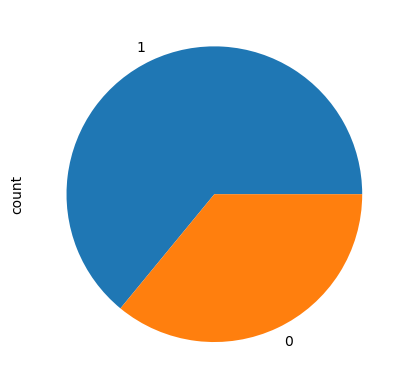

In [2031]:
train_pd["Sex"].value_counts().plot(kind = 'pie')

<h3>Category: Age</h3>

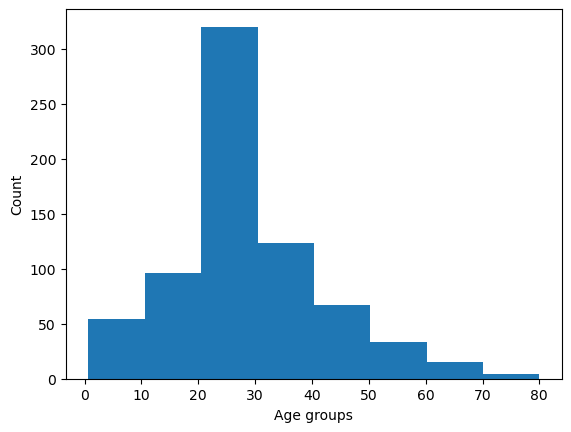

In [2033]:
plt.hist(train_pd["Age"], bins=8)
plt.xlabel("Age groups")
plt.ylabel("Count")
plt.show()

<h3>Category: Number of siblings or spouse</h3>

In [2035]:
train_pd["SibSp"].value_counts().sort_index()

SibSp
0    475
1    179
2     21
3     12
4     18
5      3
8      4
Name: count, dtype: int64

<Axes: xlabel='Number of siblings or spouse'>

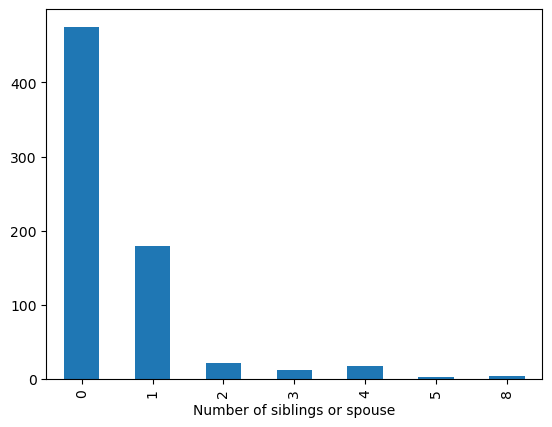

In [2036]:
train_pd["SibSp"].value_counts().sort_index().plot(kind='bar', xlabel='Number of siblings or spouse')

<h3>Category: Parent or child</h3>

In [2038]:
train_pd["Parch"].value_counts().sort_index()

Parch
0    538
1     99
2     63
3      5
4      2
5      4
6      1
Name: count, dtype: int64

<Axes: xlabel='Parent or child'>

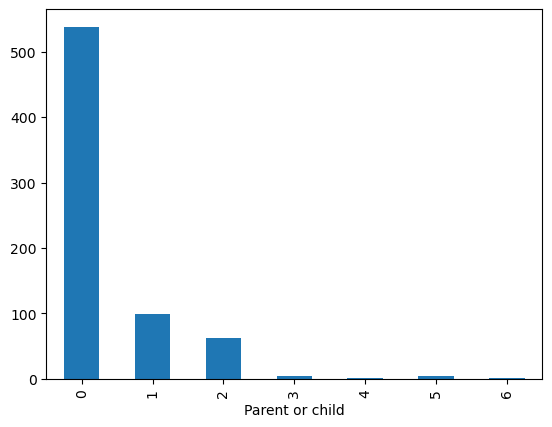

In [2039]:
train_pd["Parch"].value_counts().sort_index().plot(kind='bar', xlabel='Parent or child')

<h3>Category: Amount paid for the ticket</h3>

In [2041]:
train_pd["Fare"].sort_values()

479      0.0000
710      0.0000
374      0.0000
639      0.0000
519      0.0000
         ...   
615    263.0000
401    263.0000
16     512.3292
253    512.3292
240    512.3292
Name: Fare, Length: 712, dtype: float64

512


<Axes: >

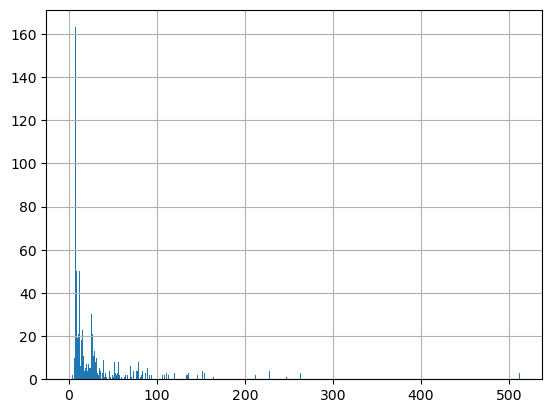

In [2042]:
countOfUniqueFares = int(max(train_pd["Fare"]))
print(countOfUniqueFares)
train_pd["Fare"].sort_values().hist(bins=countOfUniqueFares)

<h3>Category: Point of embarkment</h3>

In [2044]:
train_pd["Embarked"].unique()

array([1, 0, 2, 3], dtype=int64)

<Axes: ylabel='count'>

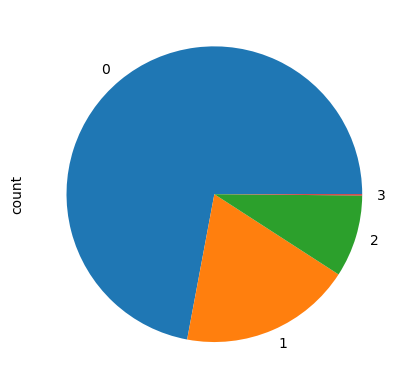

In [2045]:
train_pd["Embarked"].value_counts().plot(kind = 'pie')

<h3>Category: Survived</h3>

<Axes: ylabel='count'>

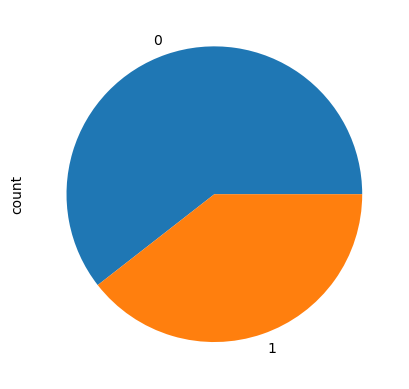

In [2047]:
train_pd["Survived"].value_counts().plot(kind = 'pie')

<h2>Pearson correlation coefficient</h2>

In [2049]:
train_pd.corr(numeric_only=True)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.126986,-0.319927,0.093572,0.048225,-0.543722,0.040708,-0.324024
Sex,0.126986,1.000000,0.089108,-0.079976,-0.242467,-0.183650,-0.124908,-0.550699
Age,-0.319927,0.089108,1.000000,-0.270404,-0.202725,0.071787,0.031524,-0.072729
SibSp,0.093572,-0.079976,-0.270404,1.000000,0.415491,0.136861,-0.049109,-0.031052
Parch,0.048225,-0.242467,-0.202725,0.415491,1.000000,0.151631,-0.072698,0.074699
Fare,-0.543722,-0.183650,0.071787,0.136861,0.151631,1.000000,0.078197,0.264345
Embarked,0.040708,-0.124908,0.031524,-0.049109,-0.072698,0.078197,1.000000,0.099162
Survived,-0.324024,-0.550699,-0.072729,-0.031052,0.074699,0.264345,0.099162,1.000000


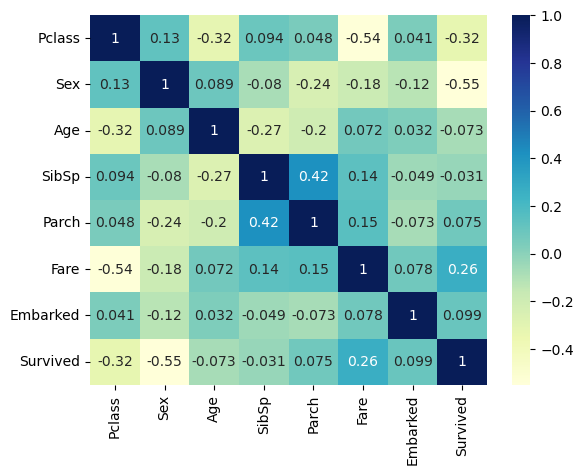

In [2050]:
dataplot = sns.heatmap(train_pd.corr(numeric_only=True), cmap="YlGnBu", annot=True)

<p>I saw there is weak relationship between 'Survived' and 'Fare'</p>

In [2052]:
train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


In [2053]:
train_pd.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


In [2054]:
train_pd.corr()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
Pclass,1.000000,0.126986,-0.319927,0.093572,0.048225,-0.543722,0.040708,-0.324024
Sex,0.126986,1.000000,0.089108,-0.079976,-0.242467,-0.183650,-0.124908,-0.550699
Age,-0.319927,0.089108,1.000000,-0.270404,-0.202725,0.071787,0.031524,-0.072729
SibSp,0.093572,-0.079976,-0.270404,1.000000,0.415491,0.136861,-0.049109,-0.031052
Parch,0.048225,-0.242467,-0.202725,0.415491,1.000000,0.151631,-0.072698,0.074699
Fare,-0.543722,-0.183650,0.071787,0.136861,0.151631,1.000000,0.078197,0.264345
Embarked,0.040708,-0.124908,0.031524,-0.049109,-0.072698,0.078197,1.000000,0.099162
Survived,-0.324024,-0.550699,-0.072729,-0.031052,0.074699,0.264345,0.099162,1.000000


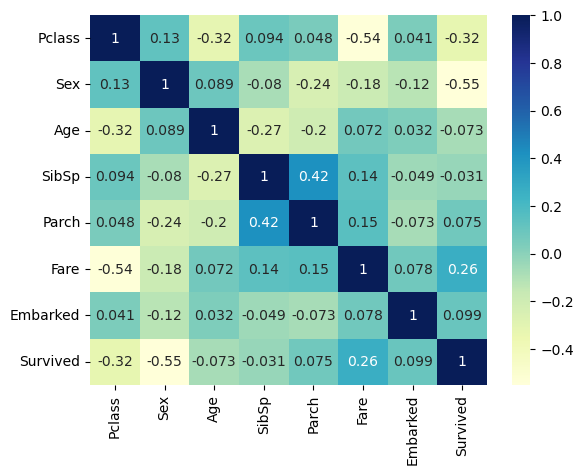

In [2055]:
dataplot = sns.heatmap(train_pd.corr(), cmap="YlGnBu", annot=True)

In [2056]:
pd.crosstab(train_pd.Embarked, train_pd.Pclass)

Pclass,1,2,3
Embarked,,,
0,105,132,276
1,70,11,53
2,2,3,59
3,1,0,0


In [2057]:
pd.crosstab(train_pd.Embarked, train_pd.Survived)

Survived,0,1
Embarked,,
0,333,180
1,58,76
2,40,24
3,0,1


In [2058]:
pd.crosstab(train_pd.Pclass, train_pd.Survived)
# write my commects and concolde

Survived,0,1
Pclass,,
1,65,113
2,79,67
3,287,101


## Part 3 - Experiments
You could add as many code cells as needed

<h2>Models of machine learning</h2>
<p>I am going to check with three models: <b>KNN</b>, <b>Decision Tree</b>, <b>Random Forest</b> and <b>GradientBoosting</b></p>
<p>In our lessons we learned <b>KNN</b> and <b>Decision Tree</b> but not <b>Random Forest</b> and <b>GradientBoosting</b>, in another course of <i>Introduction to Data Science</i> we learned about <b>Random forest</b></p>

In [2061]:
SummaryOfF1 = {}

<h2>Before feature engineering</h2>

<p>For KNN model we must to scale some variables, on minmax</p>

In [2064]:
df_cross_validation = train_pd
columns = df_cross_validation.columns
columns = columns.to_list()
columns.remove('Survived')
scaler = MinMaxScaler()
df_cross_validation[['Age_sc']] = scaler.fit_transform(df_cross_validation[['Age']])
df_cross_validation[['SibSp_sc']] = scaler.fit_transform(df_cross_validation[['SibSp']])
df_cross_validation[['Parch_sc']] = scaler.fit_transform(df_cross_validation[['Parch']])
df_cross_validation[['Fare_sc']] = scaler.fit_transform(df_cross_validation[['Fare']])
columns_X = ['Age_sc','SibSp_sc','Parch_sc','Fare_sc']
column_y = 'Survived'
X = pd.DataFrame(train_pd, columns=columns_X)
y = pd.Series(train_pd[column_y])

display(df_cross_validation[columns_X])



,Age_sc,SibSp_sc,Parch_sc,Fare_sc
0,0.672255,0.125,0.000000,0.152766
1,0.558805,0.000,0.000000,0.026350
2,0.243666,0.000,0.000000,0.018543
3,0.445355,0.000,0.000000,0.015412
4,0.268877,0.000,0.000000,0.015713
...,...,...,...,...
707,0.672255,0.000,0.000000,0.101229
708,0.168032,0.625,0.333333,0.091543
709,0.067188,0.000,0.166667,0.064412
710,0.365929,0.000,0.000000,0.000000


<h3>KNN</h3>

In [2066]:
metrics = ['minkowski', 'euclidean','manhattan']                          
weights = ['uniform', 'distance']
n_neighbors =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid_knn = {'metric':metrics , 'weights':weights , 'n_neighbors': n_neighbors}
grid_search_knn = GridSearchCV(estimator=knn, param_grid= param_grid_knn, cv=5, scoring='f1_macro')
grid_search_knn.fit(X_train, y_train)
print(grid_search_knn.best_params_)
print("f1:" ,grid_search_knn.best_score_)

SummaryOfF1['KNN_before'] = grid_search_knn.best_score_


param_grid_knn = {'metric':metrics , 'weights':weights , 'n_neighbors': n_neighbors}
grid_search_knn = GridSearchCV(estimator=knn, param_grid= param_grid_knn, cv=5, scoring='recall')
grid_search_knn.fit(X_train, y_train)
print(grid_search_knn.best_params_)
print("recall:" ,grid_search_knn.best_score_)

param_grid_knn = {'metric':metrics , 'weights':weights , 'n_neighbors': n_neighbors}
grid_search_knn = GridSearchCV(estimator=knn, param_grid= param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
print(grid_search_knn.best_params_)
print("accuracy:" ,grid_search_knn.best_score_)


{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}
f1: 0.6555168390662228
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
recall: 0.5578947368421052
{'metric': 'minkowski', 'n_neighbors': 8, 'weights': 'uniform'}
accuracy: 0.7086868686868687


<h4> Removing scaled columns</h4>

In [2068]:
df_cross_validation = df_cross_validation.drop(['SibSp_sc', 'Parch_sc','Fare_sc', 'Age_sc'], axis=1)
display(df_cross_validation)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.000000,1,0,78.2667,1,1
1,2,0,45.000000,0,0,13.5000,0,1
2,3,1,20.000000,0,0,9.5000,0,0
3,3,1,36.000000,0,0,7.8958,0,0
4,3,1,22.000000,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
707,1,1,54.000000,0,0,51.8625,0,0
708,3,1,14.000000,5,2,46.9000,0,0
709,2,0,6.000000,0,1,33.0000,0,1
710,2,1,29.699118,0,0,0.0000,0,0


<h3>Decision Tree</h3>

<h3>Best f1, recall and accuracy</h3>

In [2071]:
columns_X = df_cross_validation.columns
columns_X = columns_X.to_list()
columns_X.remove('Survived')
column_y = 'Survived'
X = pd.DataFrame(df_cross_validation, columns=columns)
y = pd.Series(df_cross_validation[column_y])

In [2072]:
criterions = ['gini', 'entropy', 'log_loss']                          
max_features = [None, 'sqrt', 'log2']
splitter = ['best','random']
dt = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid_dt = {'splitter':splitter , 'criterion':criterions , 'max_features': max_features}
grid_search_dt = GridSearchCV(estimator=dt, param_grid= param_grid_dt, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
print(grid_search_dt.best_params_)
print("f1:" ,grid_search_dt.best_score_)

SummaryOfF1['DecisionTree_before'] = grid_search_dt.best_score_

param_grid_dt = {'splitter':splitter , 'criterion':criterions , 'max_features': max_features}
grid_search_dt = GridSearchCV(estimator=dt, param_grid= param_grid_dt, cv=5, scoring='recall')
grid_search_dt.fit(X_train, y_train)
print(grid_search_dt.best_params_)
print("recall:" ,grid_search_dt.best_score_)

param_grid_dt = {'splitter':splitter , 'criterion':criterions , 'max_features': max_features}
grid_search_dt = GridSearchCV(estimator=dt, param_grid= param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
print(grid_search_dt.best_params_)
print("accuracy:" ,grid_search_dt.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'criterion': 'log_loss', 'max_features': None, 'splitter': 'random'}
f1: 0.77521414114612
{'criterion': 'gini', 'max_features': None, 'splitter': 'random'}
recall: 0.7421052631578947
{'criterion': 'log_loss', 'max_features': None, 'splitter': 'best'}
accuracy: 0.7993939393939394


<h3>Random Forest</h3>

<h3>Best f1, recall and accuracy</h3>

In [2075]:
n_estimators = [10,50,100,150]
criterions = ['gini', 'entropy', 'log_loss']                          
max_features = [None, 'sqrt', 'log2']
rf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid_rf = {'n_estimators':n_estimators, 'criterion':criterions , 'max_features': max_features }
grid_search_rf = GridSearchCV(estimator=rf, param_grid= param_grid_rf, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)
print("f1:" ,grid_search_rf.best_score_)

SummaryOfF1['RandomForest_before'] = grid_search_rf.best_score_

param_grid_rf = {'n_estimators':n_estimators, 'criterion':criterions , 'max_features': max_features }
grid_search_rf = GridSearchCV(estimator=rf, param_grid= param_grid_rf, cv=5, scoring='recall')
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)
print("recall:" ,grid_search_rf.best_score_)

param_grid_rf = {'n_estimators':n_estimators, 'criterion':criterions , 'max_features': max_features }
grid_search_rf = GridSearchCV(estimator=rf, param_grid= param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)
print("accuracy:" ,grid_search_rf.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 50}
f1: 0.8123800705487992
{'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 150}
recall: 0.7684210526315789
{'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 50}
accuracy: 0.8173737373737374


<h3>Gradient Boosting</h3>

<h3>Best f1, recall and accuracy</h3>

In [2078]:
max_features= ['sqrt', 'log2']
loss = ['log_loss', 'exponential']
criterion = ['friedman_mse', 'squared_error']
gb = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid_gb = {'loss':loss  , 'criterion': criterion, 'max_features': max_features }
grid_search_gb = GridSearchCV(estimator=gb, param_grid= param_grid_gb, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
print(grid_search_gb.best_params_)
print("f1:" ,grid_search_gb.best_score_)

SummaryOfF1['GradientBoosting_before'] = grid_search_gb.best_score_

param_grid_gb = {'loss':loss  , 'criterion': criterion, 'max_features': max_features }
grid_search_gb = GridSearchCV(estimator=gb, param_grid= param_grid_gb, cv=5, scoring='recall')
grid_search_gb.fit(X_train, y_train)
print(grid_search_gb.best_params_)
print("recall:" ,grid_search_gb.best_score_)

param_grid_gb = {'loss':loss  , 'criterion': criterion, 'max_features': max_features }
grid_search_gb = GridSearchCV(estimator=gb, param_grid= param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
print(grid_search_gb.best_params_)
print("accuracy:" ,grid_search_gb.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'criterion': 'friedman_mse', 'loss': 'exponential', 'max_features': 'log2'}
f1: 0.8115146541789693
{'criterion': 'squared_error', 'loss': 'exponential', 'max_features': 'log2'}
recall: 0.7421052631578948
{'criterion': 'friedman_mse', 'loss': 'exponential', 'max_features': 'log2'}
accuracy: 0.8193737373737374


<h3>First feature engineering: Removing duplications</h3>

<h4>Showing duplicated rows</h4>

In [2081]:
duplicates = df_cross_validation.duplicated()
df_duplicates = df_cross_validation[df_cross_validation.duplicated(keep='first')]
display(df_duplicates)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
46,3,1,29.699118,0,0,7.2500,0,0
74,3,0,29.699118,3,1,25.4667,0,0
94,3,0,29.699118,0,0,7.7500,2,1
142,2,1,34.000000,0,0,13.0000,0,0
150,3,1,20.000000,0,0,7.8542,0,0
...,...,...,...,...,...,...,...,...
697,3,1,25.000000,0,0,7.0500,0,0
700,3,0,29.699118,0,0,7.7500,2,1
704,2,1,23.000000,0,0,13.0000,0,0
706,3,1,29.699118,0,0,7.8958,0,0


#### <h4>Removing duplicated rows and first copies is not removed</h4>

In [2083]:
df_cross_validation_no_duplications = df_cross_validation.drop_duplicates(keep='first')
display(df_cross_validation_no_duplications)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
705,2,1,28.0,0,0,10.5000,0,0
707,1,1,54.0,0,0,51.8625,0,0
708,3,1,14.0,5,2,46.9000,0,0
709,2,0,6.0,0,1,33.0000,0,1


In [2084]:
print("Number of removed duplicated rows: ", len(df_cross_validation)-len(df_cross_validation_no_duplications))

Number of removed duplicated rows:  80


<h3>Second feature engineering: Removing outliers</h3>

<h4>Showing outliers by IQR of 'Fare'</h4>

In [2087]:
Q1 = df_cross_validation_no_duplications['Fare'].quantile(0.25)
Q3 = df_cross_validation_no_duplications['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the outlier range
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Show rows with outliers
outliers = df_cross_validation_no_duplications[(df_cross_validation_no_duplications['Fare'] < lower_bound) | (df_cross_validation_no_duplications['Fare'] > upper_bound)]
print(outliers.sort_values(by='Fare'))

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked  Survived
548       1    1  48.0      1      0   76.7292         1         1
513       1    0  49.0      1      0   76.7292         1         1
433       1    1  27.0      0      0   76.7292         1         1
603       1    1  54.0      0      1   77.2875         0         0
373       1    1  21.0      0      1   77.2875         0         0
..      ...  ...   ...    ...    ...       ...       ...       ...
615       1    0  23.0      3      2  263.0000         0         1
401       1    0  24.0      3      2  263.0000         0         1
240       1    0  35.0      0      0  512.3292         1         1
253       1    1  35.0      0      0  512.3292         1         1
16        1    1  36.0      0      1  512.3292         1         1

[78 rows x 8 columns]


<h4>Showing outliers by Z-score of 'Fare'</h4>

In [2089]:
df_cross_validation_no_duplications.loc[:, 'z_score'] = np.abs(stats.zscore(df_cross_validation_no_duplications['Fare']))
threshold = 3
outliers = df_cross_validation_no_duplications.loc[df_cross_validation_no_duplications['z_score'] > threshold]
print(outliers)

     Pclass  Sex        Age  SibSp  Parch      Fare  Embarked  Survived  \
6         1    1  29.699118      0      0  227.5250         1         0   
16        1    1  36.000000      0      1  512.3292         1         1   
149       1    1  24.000000      0      1  247.5208         1         0   
171       1    0  29.000000      0      0  211.3375         0         1   
240       1    0  35.000000      0      0  512.3292         1         1   
253       1    1  35.000000      0      0  512.3292         1         1   
358       1    0  18.000000      2      2  262.3750         1         1   
401       1    0  24.000000      3      2  263.0000         0         1   
461       1    0  15.000000      0      1  211.3375         0         1   
512       1    0  38.000000      0      0  227.5250         1         1   
586       1    0  42.000000      0      0  227.5250         1         1   
615       1    0  23.000000      3      2  263.0000         0         1   
665       1    0  18.0000

C:\Users\motti\AppData\Local\Temp\ipykernel_24152\3128928999.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cross_validation_no_duplications.loc[:, 'z_score'] = np.abs(stats.zscore(df_cross_validation_no_duplications['Fare']))


<h4>Remove outliers by IQR method</h4>

In [2091]:
df = pd.DataFrame(df_cross_validation_no_duplications)
df_cross_validation_no_duplications['z_score'] = np.abs(stats.zscore(df_cross_validation_no_duplications['Fare']))
threshold = 3
df_cross_validation_no_duplications_no_outliers = df_cross_validation_no_duplications[df_cross_validation_no_duplications['z_score'] <= threshold]
df_cross_validation_no_duplications_no_outliers = df_cross_validation_no_duplications_no_outliers.drop(columns=['z_score'])
display(df_cross_validation_no_duplications_no_outliers)

C:\Users\motti\AppData\Local\Temp\ipykernel_24152\3657747835.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cross_validation_no_duplications['z_score'] = np.abs(stats.zscore(df_cross_validation_no_duplications['Fare']))


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0
...,...,...,...,...,...,...,...,...
705,2,1,28.0,0,0,10.5000,0,0
707,1,1,54.0,0,0,51.8625,0,0
708,3,1,14.0,5,2,46.9000,0,0
709,2,0,6.0,0,1,33.0000,0,1


164


<Axes: >

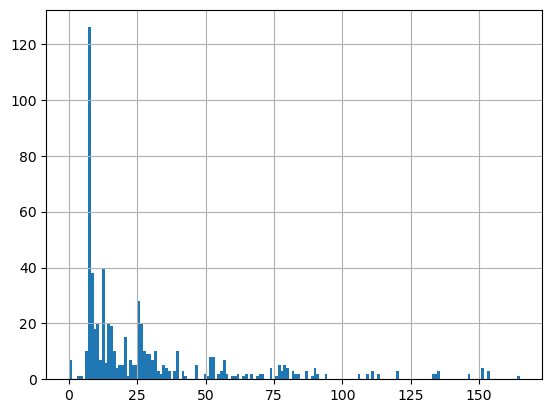

In [2092]:
countOfUniqueFares = int(max(df_cross_validation_no_duplications_no_outliers["Fare"]))
print(countOfUniqueFares)
df_cross_validation_no_duplications_no_outliers["Fare"].sort_values().hist(bins=countOfUniqueFares)

<h3>Third feature engineering: Add new features - size family and IsAlone</h3>

In [2094]:
df_cross_validation_no_duplications_no_outliers.loc[:, 'FamilySize'] = (
    df_cross_validation_no_duplications_no_outliers['SibSp'] + 
    df_cross_validation_no_duplications_no_outliers['Parch'] + 
    1
)
df_cross_validation_no_duplications_no_outliers.loc[:, 'IsAlone'] = 1  # Initialize all values to 1 (alone)
df_cross_validation_no_duplications_no_outliers.loc[df_cross_validation_no_duplications_no_outliers['FamilySize'] > 1, 'IsAlone'] = 0  # Set to 0 where FamilySize is greater than 1

In [2095]:
df_cross_validation_no_duplications_no_outliers

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,IsAlone
0,1,0,54.0,1,0,78.2667,1,1,2,0
1,2,0,45.0,0,0,13.5000,0,1,1,1
2,3,1,20.0,0,0,9.5000,0,0,1,1
3,3,1,36.0,0,0,7.8958,0,0,1,1
4,3,1,22.0,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
705,2,1,28.0,0,0,10.5000,0,0,1,1
707,1,1,54.0,0,0,51.8625,0,0,1,1
708,3,1,14.0,5,2,46.9000,0,0,8,0
709,2,0,6.0,0,1,33.0000,0,1,2,0


<h2>After feature engineering</h2>

<h3>KNN</h3>

<h4>Scaling</h4>

In [2099]:

columns = df_cross_validation_no_duplications_no_outliers.columns
columns = columns.to_list()
columns.remove('Survived')
scaler = MinMaxScaler()
df_cross_validation_no_duplications_no_outliers[['Age_sc']] = scaler.fit_transform(df_cross_validation_no_duplications_no_outliers[['Age']])
df_cross_validation_no_duplications_no_outliers[['SibSp_sc']] = scaler.fit_transform(df_cross_validation_no_duplications_no_outliers[['SibSp']])
df_cross_validation_no_duplications_no_outliers[['Parch_sc']] = scaler.fit_transform(df_cross_validation_no_duplications_no_outliers[['Parch']])
df_cross_validation_no_duplications_no_outliers[['Fare_sc']] = scaler.fit_transform(df_cross_validation_no_duplications_no_outliers[['Fare']])
columns_X = ['Age_sc','SibSp_sc','Parch_sc','Fare_sc']
column_y = 'Survived'
X = pd.DataFrame(df_cross_validation_no_duplications_no_outliers, columns=columns_X)
y = pd.Series(df_cross_validation_no_duplications_no_outliers[column_y])

display(df_cross_validation_no_duplications_no_outliers[columns_X])

,Age_sc,SibSp_sc,Parch_sc,Fare_sc
0,0.672255,0.125,0.000000,0.474727
1,0.558805,0.000,0.000000,0.081884
2,0.243666,0.000,0.000000,0.057622
3,0.445355,0.000,0.000000,0.047892
4,0.268877,0.000,0.000000,0.048827
...,...,...,...,...
705,0.344510,0.000,0.000000,0.063688
707,0.672255,0.000,0.000000,0.314572
708,0.168032,0.625,0.333333,0.284472
709,0.067188,0.000,0.166667,0.200162


<h3>Best f1, recall and accuracy</h3>

In [2101]:
metrics = ['minkowski', 'euclidean','manhattan']                          
weights = ['uniform', 'distance']
n_neighbors =[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
knn = KNeighborsClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid_knn = {'metric':metrics , 'weights':weights , 'n_neighbors': n_neighbors}
grid_search_knn = GridSearchCV(estimator=knn, param_grid= param_grid_knn, cv=5, scoring='f1_macro')
grid_search_knn.fit(X_train, y_train)
print(grid_search_knn.best_params_)
print("f1:" ,grid_search_knn.best_score_)

SummaryOfF1['KNN_after'] = grid_search_knn.best_score_


param_grid_knn = {'metric':metrics , 'weights':weights , 'n_neighbors': n_neighbors}
grid_search_knn = GridSearchCV(estimator=knn, param_grid= param_grid_knn, cv=5, scoring='recall')
grid_search_knn.fit(X_train, y_train)
print(grid_search_knn.best_params_)
print("recall:" ,grid_search_knn.best_score_)

param_grid_knn = {'metric':metrics , 'weights':weights , 'n_neighbors': n_neighbors}
grid_search_knn = GridSearchCV(estimator=knn, param_grid= param_grid_knn, cv=5, scoring='accuracy')
grid_search_knn.fit(X_train, y_train)
print(grid_search_knn.best_params_)
print("accuracy:" ,grid_search_knn.best_score_)


{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}
f1: 0.6515754736057591
{'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'distance'}
recall: 0.555105105105105
{'metric': 'manhattan', 'n_neighbors': 12, 'weights': 'uniform'}
accuracy: 0.6812616947340283


<h3>Decision Tree</h3>

<h4>Removing scaled columns</h4>

In [2104]:
df_cross_validation_no_duplications_no_outliers = df_cross_validation_no_duplications_no_outliers.drop(['SibSp_sc', 'Parch_sc','Fare_sc', 'Age_sc'], axis=1)
display(df_cross_validation_no_duplications_no_outliers)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,IsAlone
0,1,0,54.0,1,0,78.2667,1,1,2,0
1,2,0,45.0,0,0,13.5000,0,1,1,1
2,3,1,20.0,0,0,9.5000,0,0,1,1
3,3,1,36.0,0,0,7.8958,0,0,1,1
4,3,1,22.0,0,0,8.0500,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...
705,2,1,28.0,0,0,10.5000,0,0,1,1
707,1,1,54.0,0,0,51.8625,0,0,1,1
708,3,1,14.0,5,2,46.9000,0,0,8,0
709,2,0,6.0,0,1,33.0000,0,1,2,0


<h3>Best f1, recall and accuracy</h3>

In [2106]:
columns_X = df_cross_validation_no_duplications_no_outliers.columns
columns_X = columns_X.to_list()
columns_X.remove('Survived')
column_y = 'Survived'
X = pd.DataFrame(df_cross_validation_no_duplications_no_outliers, columns=columns)
y = pd.Series(df_cross_validation_no_duplications_no_outliers[column_y])

In [2107]:
criterions = ['gini', 'entropy', 'log_loss']                          
max_features = [None, 'sqrt', 'log2']
splitter = ['best','random']
dt = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid_dt = {'splitter':splitter , 'criterion':criterions , 'max_features': max_features}
grid_search_dt = GridSearchCV(estimator=dt, param_grid= param_grid_dt, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid_search_dt.fit(X_train, y_train)
print(grid_search_dt.best_params_)
print("f1:" ,grid_search_dt.best_score_)

SummaryOfF1['DecisionTree_after'] = grid_search_dt.best_score_

param_grid_dt = {'splitter':splitter , 'criterion':criterions , 'max_features': max_features}
grid_search_dt = GridSearchCV(estimator=dt, param_grid= param_grid_dt, cv=5, scoring='recall')
grid_search_dt.fit(X_train, y_train)
print(grid_search_dt.best_params_)
print("recall:" ,grid_search_dt.best_score_)

param_grid_dt = {'splitter':splitter , 'criterion':criterions , 'max_features': max_features}
grid_search_dt = GridSearchCV(estimator=dt, param_grid= param_grid_dt, cv=5, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
print(grid_search_dt.best_params_)
print("accuracy:" ,grid_search_dt.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
{'criterion': 'log_loss', 'max_features': 'log2', 'splitter': 'best'}
f1: 0.700377892413344
{'criterion': 'log_loss', 'max_features': 'log2', 'splitter': 'random'}
recall: 0.6708708708708708
{'criterion': 'log_loss', 'max_features': 'log2', 'splitter': 'random'}
accuracy: 0.7021651964715316


<h3>Random Forest</h3>

<h3>Best f1, recall and accuracy</h3>

In [2110]:
n_estimators = [10,50,100,150]
criterions = ['gini', 'entropy', 'log_loss']                          
max_features = [None, 'sqrt', 'log2']
rf = RandomForestClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid_rf = {'n_estimators':n_estimators, 'criterion':criterions , 'max_features': max_features }
grid_search_rf = GridSearchCV(estimator=rf, param_grid= param_grid_rf, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)
print("f1:" ,grid_search_rf.best_score_)

SummaryOfF1['RandomForest_after'] = grid_search_rf.best_score_

param_grid_rf = {'n_estimators':n_estimators, 'criterion':criterions , 'max_features': max_features }
grid_search_rf = GridSearchCV(estimator=rf, param_grid= param_grid_rf, cv=5, scoring='recall')
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)
print("recall:" ,grid_search_rf.best_score_)

param_grid_rf = {'n_estimators':n_estimators, 'criterion':criterions , 'max_features': max_features }
grid_search_rf = GridSearchCV(estimator=rf, param_grid= param_grid_rf, cv=5, scoring='accuracy')
grid_search_rf.fit(X_train, y_train)
print(grid_search_rf.best_params_)
print("accuracy:" ,grid_search_rf.best_score_)


Fitting 5 folds for each of 36 candidates, totalling 180 fits
{'criterion': 'log_loss', 'max_features': None, 'n_estimators': 50}
f1: 0.7506997148255622
{'criterion': 'entropy', 'max_features': None, 'n_estimators': 150}
recall: 0.6764264264264265
{'criterion': 'log_loss', 'max_features': None, 'n_estimators': 150}
accuracy: 0.759930499866346


<h3>Gradient Boosting3</h3>

<h3>Best f1, recall and accuracy</h3>

In [2113]:
max_features= ['sqrt', 'log2']
loss = ['log_loss', 'exponential']
criterion = ['friedman_mse', 'squared_error']
gb = GradientBoostingClassifier()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

param_grid_gb = {'loss':loss  , 'criterion': criterion, 'max_features': max_features }
grid_search_gb = GridSearchCV(estimator=gb, param_grid= param_grid_gb, cv=5, scoring='f1_macro', verbose=1, n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
print(grid_search_gb.best_params_)
print("f1:" ,grid_search_gb.best_score_)

SummaryOfF1['GradientBoosting_after'] = grid_search_gb.best_score_

param_grid_gb = {'loss':loss  , 'criterion': criterion, 'max_features': max_features }
grid_search_gb = GridSearchCV(estimator=gb, param_grid= param_grid_gb, cv=5, scoring='recall')
grid_search_gb.fit(X_train, y_train)
print(grid_search_gb.best_params_)
print("recall:" ,grid_search_gb.best_score_)

param_grid_gb = {'loss':loss  , 'criterion': criterion, 'max_features': max_features }
grid_search_gb = GridSearchCV(estimator=gb, param_grid= param_grid_gb, cv=5, scoring='accuracy')
grid_search_gb.fit(X_train, y_train)
print(grid_search_gb.best_params_)
print("accuracy:" ,grid_search_gb.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
{'criterion': 'friedman_mse', 'loss': 'log_loss', 'max_features': 'log2'}
f1: 0.7894481030339855
{'criterion': 'squared_error', 'loss': 'exponential', 'max_features': 'sqrt'}
recall: 0.7147147147147146
{'criterion': 'squared_error', 'loss': 'log_loss', 'max_features': 'sqrt'}
accuracy: 0.7991980753809143


<h3>Compare f1 scores</h3>

In [2115]:
display(SummaryOfF1)

{'KNN_before': 0.6555168390662228,
 'DecisionTree_before': 0.77521414114612,
 'RandomForest_before': 0.8123800705487992,
 'GradientBoosting_before': 0.8115146541789693,
 'KNN_after': 0.6515754736057591,
 'DecisionTree_after': 0.700377892413344,
 'RandomForest_after': 0.7506997148255622,
 'GradientBoosting_after': 0.7894481030339855}

## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [2168]:
test_pd = pd.read_csv("titanic_test.csv")

<h3>Feature engineering on test dateset</h3>

In [2171]:
df_cross_validation_no_duplications_test = test_pd.drop_duplicates(keep='first')

df = pd.DataFrame(df_cross_validation_no_duplications_test)
df_cross_validation_no_duplications_test['z_score'] = np.abs(stats.zscore(df_cross_validation_no_duplications_test['Fare']))
threshold = 3
df_cross_validation_no_duplications_no_outliers_test = df_cross_validation_no_duplications_test[df_cross_validation_no_duplications_test['z_score'] <= threshold]
df_cross_validation_no_duplications_no_outliers_test = df_cross_validation_no_duplications_no_outliers_test.drop(columns=['z_score'])

df_cross_validation_no_duplications_no_outliers_test.loc[:, 'FamilySize'] = (
    df_cross_validation_no_duplications_no_outliers_test['SibSp'] + 
    df_cross_validation_no_duplications_no_outliers_test['Parch'] + 
    1
)
df_cross_validation_no_duplications_no_outliers_test.loc[:, 'IsAlone'] = 1  # Initialize all values to 1 (alone)
df_cross_validation_no_duplications_no_outliers_test.loc[df_cross_validation_no_duplications_no_outliers_test['FamilySize'] > 1, 'IsAlone'] = 0  # Set to 0 where FamilySize is greater than 1

display(df_cross_validation_no_duplications_no_outliers_test)

C:\Users\motti\AppData\Local\Temp\ipykernel_24152\2223937270.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cross_validation_no_duplications_test['z_score'] = np.abs(stats.zscore(df_cross_validation_no_duplications_test['Fare']))


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived,FamilySize,IsAlone
0,3,1,35.000000,0,0,7.0500,0,0,1,1
1,3,1,30.000000,0,0,7.2500,0,0,1,1
2,3,1,29.699118,0,0,14.5000,0,0,1,1
3,3,0,21.000000,0,0,7.7500,2,0,1,1
4,3,1,32.000000,0,0,56.4958,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
174,3,1,29.000000,0,0,7.7500,2,1,1,1
175,3,0,45.000000,0,1,14.4542,1,0,2,0
176,2,1,23.000000,0,0,13.0000,0,0,1,1
177,3,1,40.000000,1,4,27.9000,0,0,6,0


<h3>Training</h3>

In [2173]:
X_train = df_cross_validation_no_duplications_no_outliers.drop('Survived', axis=1)
y_train = df_cross_validation_no_duplications_no_outliers['Survived']               
X_test = df_cross_validation_no_duplications_no_outliers_test.drop(['Survived'], axis=1)
y_test = df_cross_validation_no_duplications_no_outliers_test['Survived']

display(X_train)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone
0,1,0,54.0,1,0,78.2667,1,2,0
1,2,0,45.0,0,0,13.5000,0,1,1
2,3,1,20.0,0,0,9.5000,0,1,1
3,3,1,36.0,0,0,7.8958,0,1,1
4,3,1,22.0,0,0,8.0500,0,1,1
...,...,...,...,...,...,...,...,...,...
705,2,1,28.0,0,0,10.5000,0,1,1
707,1,1,54.0,0,0,51.8625,0,1,1
708,3,1,14.0,5,2,46.9000,0,8,0
709,2,0,6.0,0,1,33.0000,0,2,0


In [2175]:
gb_classifier = gb = GradientBoostingClassifier(criterion= 'friedman_mse', loss= 'log_loss',max_features= 'log2')
gb_classifier.fit(X_train, y_train)


GradientBoostingClassifier(max_features='log2')

## Part 5 - Apply on test and show model performance estimation

In [2178]:
y_pred = gb_classifier.predict(X_test)
y_pred = pd.DataFrame(y_pred)
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 83.75%


In [2180]:
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

[[94  9]
 [17 40]]


In [2184]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, y_pred)
print(f'Precision: {precision:.2f}')
recall = recall_score(y_test, y_pred)
print(f'Recall: {recall:.2f}')
f1 = f1_score(y_test, y_pred)
print(f'F1-Score: {f1:.2f}')

Precision: 0.82
Recall: 0.70
F1-Score: 0.75


In [2186]:
y_pred.head(15)

,0
0,0
1,0
2,0
3,1
4,0
5,0
6,0
7,0
8,1
9,0


In [2188]:
y_test.head(15)

0     0
1     0
2     0
3     0
4     1
5     1
6     0
7     0
8     1
9     0
10    1
11    0
12    0
13    0
14    0
Name: Survived, dtype: int64